## Exercise 1: Decisive Distributions

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables

from dotenv import load_dotenv

load_dotenv("newkeys.env")

%matplotlib inline


In [6]:

# Setup Alpaca API environment


alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [10]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2020-03-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-27", tz="America/New_York").isoformat()

# Set the stock tickers
# YOUR CODE HERE!
ticker = ["SPY","LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# YOUR CODE HERE!
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

AAPL                                       DIS  \
                             open    high     low   close    volume    open   
time                                                                          
2020-03-27 00:00:00-04:00  252.75  255.87  247.05  247.62  45641532  100.45   
2020-03-30 00:00:00-04:00  250.74  255.52  249.40  254.79  37524398   95.92   
2020-03-31 00:00:00-04:00  255.60  262.49  252.00  254.30  41083385  100.22   
2020-04-01 00:00:00-04:00  246.50  248.72  239.13  240.76  39826068   93.50   
2020-04-02 00:00:00-04:00  240.34  245.15  236.90  244.93  75974814   94.20   

                                                            ...     SPY  \
                              high    low  close    volume  ...    open   
time                                                        ...           
2020-03-27 00:00:00-04:00  101.490  95.54  96.33  28096449  ...  253.27   
2020-03-30 00:00:00-04:00  100.460  92.10  99.85  20798213  ...  255.70   
2020-03-31 00:00:00-04:00  103.160  96.16  96.59  19633660  ...  260.56   
2020-04-01 00:00:00-04:00   97.400  92.56  94.92  16729565  ...  247.98   
2020-04-02 00:00:00-04:00   97.255  94.20  96.96  11816835  ...  245.19   

                                                                 WORK         \
                               high     low   close     volume   open   high   
time                                                                           
2020-03-27 00:00:00-04:00  260.8100  251.05  253.39  191462093  27.75  29.54   
2020-03-30 00:00:00-04:00  262.4300  253.53  261.68  139095982  29.09  29.71   
2020-03-31 00:00:00-04:00  263.3300  256.22  257.70  159223028  28.36  28.44   
2020-04-01 00:00:00-04:00  257.6591  243.90  246.12  170515975  26.15  27.37   
2020-04-02 00:00:00-04:00  252.6800  244.59  251.87  155820022  25.48  26.25   

                                                     
                               low  close    volume  
time                                                 
2020-03-27 00:00:00-04:00  26.3200  28.59  17384612  
2020-03-30 00:00:00-04:00  27.8500  28.21  12376524  
2020-03-31 00:00:00-04:00  26.5200  26.85  11038516  
2020-04-01 00:00:00-04:00  25.5817  25.75   8162941  
2020-04-02 00:00:00-04:00  23.5600  24.26  10664245  

[5 rows x 30 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [11]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
# YOUR CODE HERE!

for tkr in ticker:
    df_closing_prices[tkr] = df_ticker[tkr]["close"]
    

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2020-03-27,253.39,36.3750,96.33,247.62,66.35,28.59
2020-03-30,261.68,35.1050,99.85,254.79,67.86,28.21
2020-03-31,257.70,35.5700,96.59,254.30,65.73,26.85
2020-04-01,246.12,32.0301,94.92,240.76,62.63,25.75
2020-04-02,251.87,31.5100,96.96,244.93,65.03,24.26


### Calculate the daily returns for each stock using the `pct_change()` function

In [12]:
# Compute daily returns
# YOUR CODE HERE!
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2020-03-30,0.032716,-0.034914,0.036541,0.028956,0.022758,-0.013291
2020-03-31,-0.015209,0.013246,-0.032649,-0.001923,-0.031388,-0.048210
2020-04-01,-0.044936,-0.099519,-0.017290,-0.053244,-0.047163,-0.040968
2020-04-02,0.023363,-0.016238,0.021492,0.017320,0.038320,-0.057864
2020-04-03,-0.014531,-0.030784,-0.031869,-0.014290,-0.029679,0.000000


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

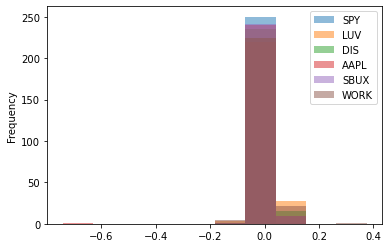

In [20]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
# YOUR CODE HERE!
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

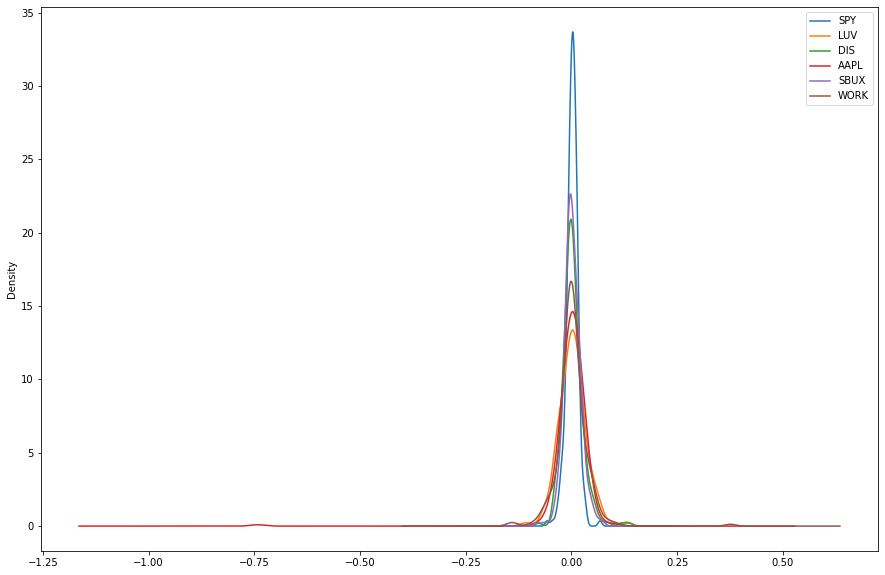

In [18]:
# Visualize the distribution of daily returns across all stocks using a density plot
# YOUR CODE HERE!
df_daily_returns.plot.density(figsize=(15,10))